# Direct comparison of original and extended Mon Jasnow 
---

In [8]:
# Some imports
import numpy as np
import matplotlib.pyplot as plt
# from numba import njit
import palettable as pl
emr = pl.cartocolors.sequential.Emrld_7_r.get_mpl_colormap()
# plt.style.use('Solarize_Light2')
plt.style.use('default')
from time import time

## $\tau$ vs $T$

In [2]:
from mon_jasnow import get_tau_2

In [26]:
Tc = 2 /(np.log(1+np.sqrt(2)))          # Tc
N_size = 10
N_points =30                            # Number of Temperature points to check
T = np.linspace(0.1*Tc, 1.4*Tc, N_points)   # Temperature point list
N_sweeps = 10000                      
N_runs = 1
skips = 3

In [27]:
%time tau_mj, tau_ex = get_tau_2(N_size, N_sweeps, T, N_runs, skips)

Wall time: 13.7 s


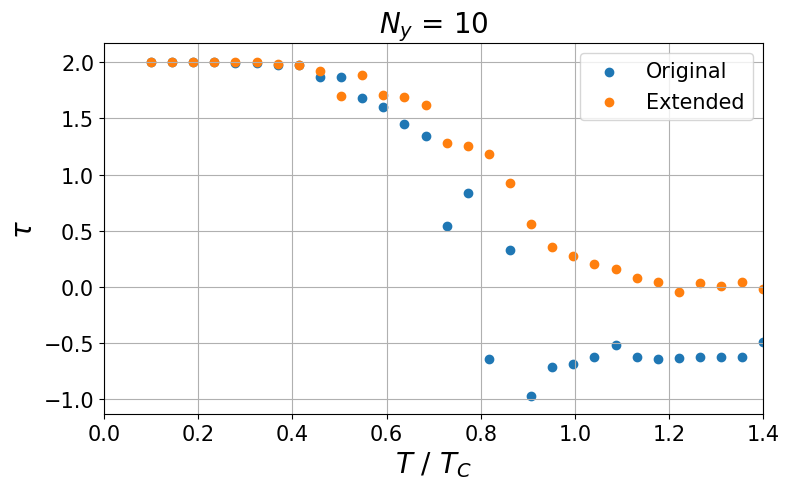

In [28]:
plt.figure(figsize=(8,5), tight_layout=True)
plt.scatter(T/Tc, tau_mj, label ='Original')
plt.scatter(T/Tc, tau_ex, label ='Extended') 
plt.xlim(0,1.4)
# plt.ylim(0,2.2)
plt.xlabel(fr"$T\ /\ T_C$", size=20)
plt.title(f"$N_y$ = {N_size}", size=20)
plt.ylabel(fr"$\tau$", size = 20)
plt.grid()
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)